In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

# Making The Dataset

In [2]:
# first we get randomly generated point in [0,2pi]
start = np.random.random() * np.pi
start

0.11399684688546623

In [3]:
# now we will get 20 evenly spaced points in the range [start , start+2*pi]
x = np.linspace(start,start+2*np.pi,num=20)
# now getting the sine values for these points
# these will be target values
y= np.sin(x)
# add noise to it so that we get trainingdata for denoising autoencoder
noise = np.random.normal(0,0.1,20)
y_noise = noise + y

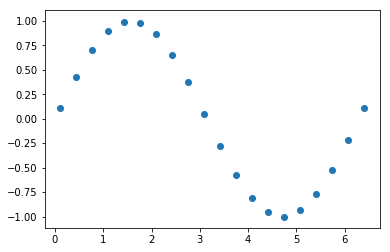

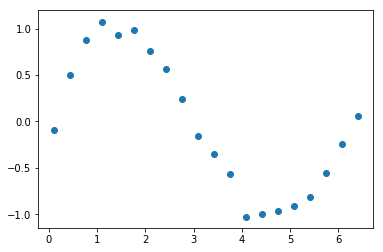

In [4]:
# now we visualize both the data
# clean data
plt.scatter(x,y)
plt.show()
# noisy data
plt.scatter(x,y_noise)
plt.show()

In [5]:
# now that we have created one data point we proceed to get a dataset 
# by repeating the above sets
# we run a loop to get 1000 instances
target = []
noisy_input = [] 
x_list = []

In [6]:
for i in range(1000):
    start = np.random.random() * np.pi
    x = np.linspace(start,start+2*np.pi,num=20)
    y= np.sin(x)
    noise = np.random.normal(0,0.1,20)
    y_noise = noise + y
    target.append(y)
    noisy_input.append(y_noise)
    x_list.append(x)
target = np.array(target)
noisy_input = np.array(noisy_input)

In [7]:
target.shape

(1000, 20)

In [8]:
noisy_input.shape

(1000, 20)

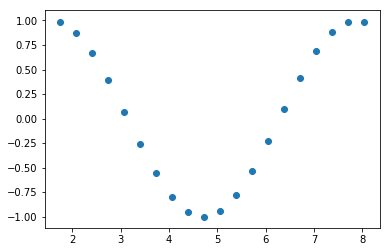

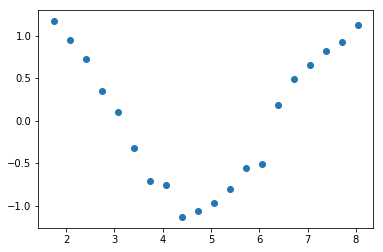

In [9]:
# now we visualize both the data
# clean data
plt.scatter(x_list[626],target[626])
plt.show()
# noisy data
plt.scatter(x_list[626],noisy_input[626])
plt.show()
# can visualize different data points by changing index


# Model

In [10]:
target = torch.from_numpy(target)
noisy_input = torch.from_numpy(noisy_input)

In [11]:
target = target.type(torch.FloatTensor)
noisy_input = noisy_input.type(torch.FloatTensor)

In [12]:
noisy_input[0].shape

torch.Size([20])

In [13]:
target.shape

torch.Size([1000, 20])

In [54]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(20,10)
        self.fc2 = nn.Linear(10 ,20)
#         self.fc3 = nn.Linear()
    
    def forward(self,x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x
#         x = self.fc3(x)
        
        

In [55]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=20, out_features=10)
  (fc2): Linear(in_features=10, out_features=20)
)


In [56]:
inp = Variable(noisy_input[0].view(1,-1))
tar = Variable(target[0].view(1,-1))
output = net(inp)
# print(output)
# net.zero_grad()
# output.backward(torch.randn(1,20))


In [57]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters())

In [58]:
net.zero_grad()
loss = criterion(output, tar)
print(loss)
loss.backward()
optimizer.step()

Variable containing:
 0.5180
[torch.FloatTensor of size 1]



In [59]:
for i in range(10000):
    # get the inputs
    inputs, labels = noisy_input[:800] , target[:800]

    # wrap them in Variable
    inputs, labels = Variable(inputs.view(-1,20)), Variable(labels.view(-1,20))
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('loss: %.3f' % (loss ))
            

print('Finished Training')

loss: 0.578
loss: 0.572
loss: 0.566
loss: 0.559
loss: 0.552
loss: 0.546
loss: 0.539
loss: 0.532
loss: 0.525
loss: 0.519
loss: 0.512
loss: 0.505
loss: 0.499
loss: 0.493
loss: 0.486
loss: 0.480
loss: 0.474
loss: 0.467
loss: 0.461
loss: 0.455
loss: 0.449
loss: 0.443
loss: 0.437
loss: 0.432
loss: 0.426
loss: 0.420
loss: 0.415
loss: 0.409
loss: 0.404
loss: 0.398
loss: 0.393
loss: 0.388
loss: 0.383
loss: 0.377
loss: 0.372
loss: 0.367
loss: 0.362
loss: 0.357
loss: 0.353
loss: 0.348
loss: 0.343
loss: 0.338
loss: 0.334
loss: 0.329
loss: 0.325
loss: 0.320
loss: 0.316
loss: 0.311
loss: 0.307
loss: 0.303
loss: 0.298
loss: 0.294
loss: 0.290
loss: 0.286
loss: 0.282
loss: 0.278
loss: 0.273
loss: 0.269
loss: 0.266
loss: 0.262
loss: 0.258
loss: 0.254
loss: 0.250
loss: 0.246
loss: 0.243
loss: 0.239
loss: 0.235
loss: 0.232
loss: 0.228
loss: 0.225
loss: 0.221
loss: 0.218
loss: 0.214
loss: 0.211
loss: 0.208
loss: 0.204
loss: 0.201
loss: 0.198
loss: 0.195
loss: 0.192
loss: 0.189
loss: 0.186
loss: 0.183
loss

loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss: 0.005
loss

loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss: 0.003
loss

loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss: 0.002
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss: 0.001
loss

loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss

loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss: 0.000
loss

In [67]:
out = net(Variable(noisy_input[901].view(1,-1)))

In [68]:
a = np.array(out.data)
a.shape

(1, 20)

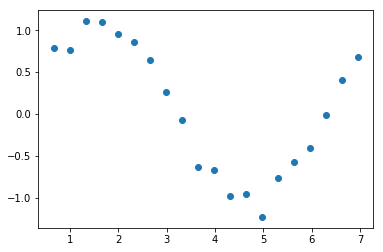

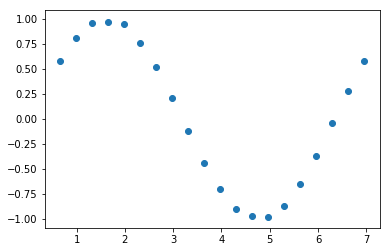

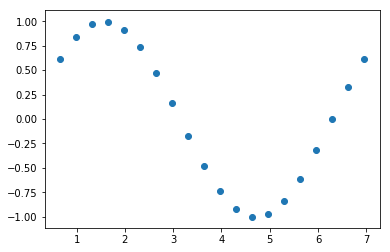

In [69]:
# noisy
plt.scatter(x_list[901],np.array(noisy_input[901]))
plt.show()
# predicted
plt.scatter(x_list[901],a)
plt.show()
# actual
plt.scatter(x_list[901],np.array(target[901]))
plt.show()